In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler

# PCA Clustering of Soccer Players into their Positions based on their Attributes

### By Bennett Cohen

In [2]:
GlobalData = pd.read_csv("FullData.csv")
GlobalData = GlobalData.drop(columns = ['National_Position', 'National_Kit', 'Contract_Expiry','Rating', 'Club_Joining'])
GlobalData.head()

,Name,Nationality,Club,Club_Position,Club_Kit,Height,Weight,Preffered_Foot,Birth_Date,Age,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,Real Madrid,LW,7.0,185 cm,80 kg,Right,02/05/1985,32,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,FC Barcelona,RW,10.0,170 cm,72 kg,Left,06/24/1987,29,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,FC Barcelona,LW,11.0,174 cm,68 kg,Right,02/05/1992,25,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,FC Barcelona,ST,9.0,182 cm,85 kg,Right,01/24/1987,30,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,FC Bayern,GK,1.0,193 cm,92 kg,Right,03/27/1986,31,...,16,14,11,47,11,91,89,95,90,89


In [3]:
GlobalData['Club_Position'].unique()

array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', nan, 'CF'],
      dtype=object)

In [4]:
GlobalData = GlobalData[GlobalData['Club_Position'] != 'Res']
GlobalData = GlobalData[GlobalData['Club_Position'] != 'Sub']

In [5]:
len(GlobalData)

6950

In [6]:
Position = ['0'] * 6950
counter = 0
for i in GlobalData['Club_Position']:   
    if i in {'LW', 'RW', 'ST', 'RS', 'RF', 'LS', 'CF', 'LF'}: 
        Position[counter] = 'F'
        counter += 1
    if i in {'RCM', 'CAM', 'LCM', 'LM', 'LDM', 'RM', 'CDM', 'RDM', 'LAM', 'CM', 'RAM'}:
        Position[counter] = 'M'
        counter += 1
    if i in {'LCB', 'RB', 'RCB', 'LB', 'CB', 'RWB', 'LWB'}:
        Position[counter] = 'D'
        counter += 1
    if i == 'GK':
        Position[counter] = 'G'
        counter += 1
Position[6949] = 'D'
GlobalData['Position'] = Position
GlobalData = GlobalData.drop(columns = ['Club_Position', 'Preffered_Position'])

In [7]:
X = GlobalData.drop(columns = 'Position')
y = np.ravel(Position)
X = X.select_dtypes(include=np.number)
X = X.dropna()

indexes = np.arange(0, 6949)
train_index = np.random.choice(indexes, 5560, replace = False)

test_index = []
for i in indexes:
    if i not in train_index:
        test_index.append(i)

In [8]:
X_pca = StandardScaler().fit_transform(X)
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, pd.Series(y)], axis = 1)
finalDf

,PC1,PC2,0
0,-7.796761,-4.302745,F
1,-7.633630,-5.722137,F
2,-7.023266,-5.566937,F
3,-5.951407,-3.972081,F
4,9.745037,-3.272635,G
...,...,...,...
6945,3.311334,0.681706,D
6946,4.488499,1.814126,D
6947,2.384223,-2.654558,M
6948,5.368986,1.564300,D


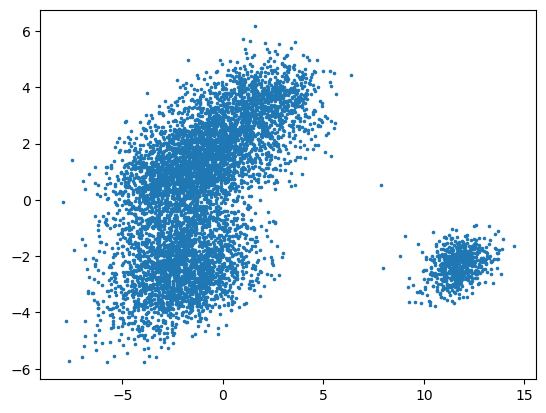

In [9]:
plt.scatter(finalDf.PC1,finalDf.PC2, s = 2.5)

<bound method _AxesBase.grid of <AxesSubplot: title={'center': '2 component PCA'}, xlabel='PC1', ylabel='PC2'>>

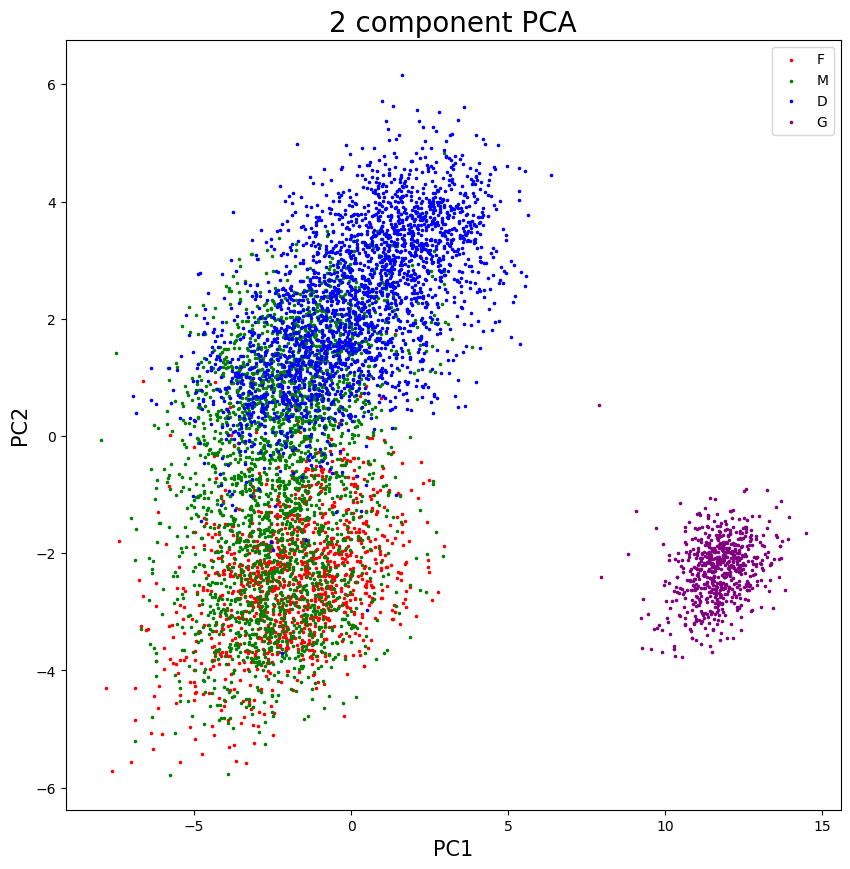

In [10]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['F', 'M', 'D', 'G']
colors = ['r', 'g', 'b', 'purple']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
               finalDf.loc[indicesToKeep, 'PC2'],
               c = color, 
               s = 2.5)
ax.legend(targets)
ax.grid

In [11]:
sum(pca.explained_variance_ratio_)

0.6340941029173932

In [12]:
X_pca = StandardScaler().fit_transform(X)
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(X_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3'])
finalDf = pd.concat([principalDf, pd.Series(y)], axis = 1)
finalDf

,PC1,PC2,PC3,0
0,-7.796761,-4.302745,-3.594343,F
1,-7.633630,-5.722137,-2.626457,F
2,-7.023266,-5.566937,-1.076041,F
3,-5.951407,-3.972081,-4.511561,F
4,9.745037,-3.272635,-5.349841,G
...,...,...,...,...
6945,3.311334,0.681706,3.670069,D
6946,4.488499,1.814126,2.695352,D
6947,2.384223,-2.654558,2.291803,M
6948,5.368986,1.564300,3.925902,D


<bound method Axes3D.grid of <Axes3DSubplot: title={'center': '3 component PCA'}, xlabel='PC1', ylabel='PC2', zlabel='PC3'>>

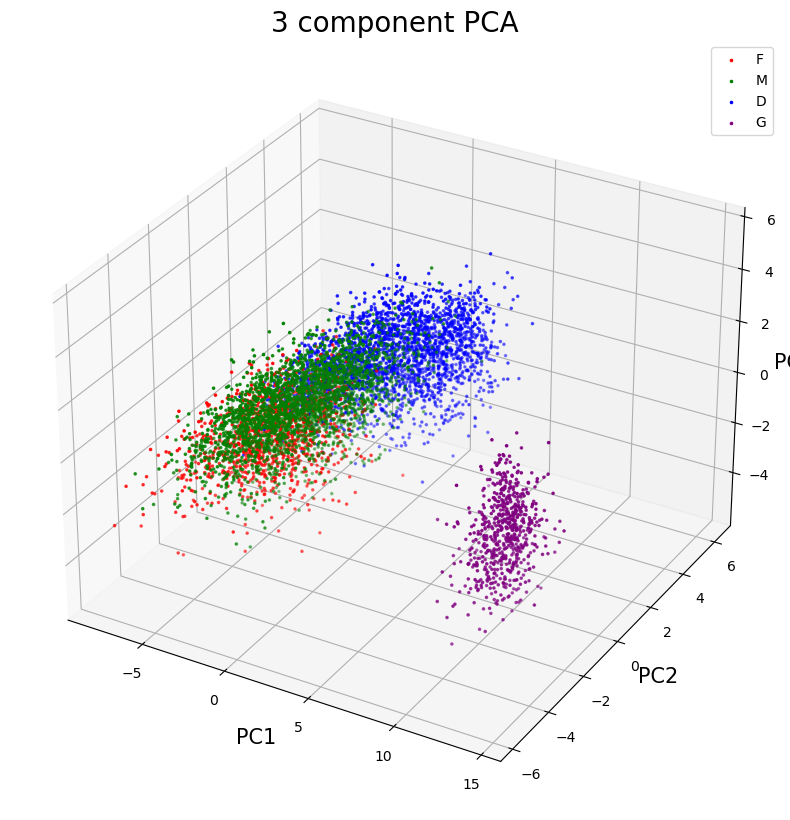

In [13]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['F', 'M', 'D', 'G']
colors = ['r', 'g', 'b', 'purple']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
               finalDf.loc[indicesToKeep, 'PC2'],
               finalDf.loc[indicesToKeep, 'PC3'],
               c = color, 
               s = 2.5)
ax.legend(targets)
ax.grid

In [14]:
pca.explained_variance_ratio_

array([0.48129454, 0.15279957, 0.06975023])

In [15]:
sum(pca.explained_variance_ratio_)

0.7038443321405831